In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.architecture import *
from src.Tensor import *
from src.functions import *

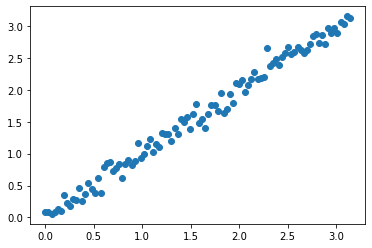

In [2]:
# Generate data
X = [[x] for x in np.linspace(0, np.pi, 100)]
Y = [[np.random.normal(x, 0.1)] for x in X]

Data = [(X[n], Y[n]) for n in range(len(X))]
plt.scatter(X, Y)

In [5]:
# Set Parameters
epochs = 10
lr = 0.1
lrSchedulerStep = 5
hiddenLayers = [4,4,1]

# Create model
m = MLP(1, hiddenLayers)

In [6]:
# Train
print('Train for {} epochs.'.format(epochs))

for epoch in range(epochs):
    if (epoch+1) % lrSchedulerStep == 0:
        lr *= 0.1

    running_loss = 0
    random.shuffle(Data)

    for (x, y) in Data:
        pred = m(x)
        loss = mseLoss(pred, y)

        loss.zero_grad()
        dDict = loss.depthDict()
        loss.backward(dDict)
        loss.optimize(lr, dDict)

        running_loss += loss
        
    print('Epoch: {}, Loss = {}'.format(epoch, running_loss.val/len(X), lr))

Train for 10 epochs.
Epoch: 0, Loss = [0.52519661]
Epoch: 1, Loss = [-0.00358011]
Epoch: 2, Loss = [-0.05124]
Epoch: 3, Loss = [0.03423904]
Epoch: 4, Loss = [0.00190219]
Epoch: 5, Loss = [0.00206065]
Epoch: 6, Loss = [0.00209573]
Epoch: 7, Loss = [0.00103113]
Epoch: 8, Loss = [0.00222509]
Epoch: 9, Loss = [0.01012932]


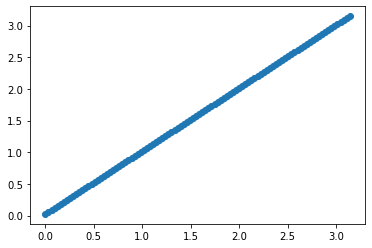

In [8]:
# Test
X_test = [x for x in np.linspace(0, np.pi, 100)]
Y_pred = [m([x])[0].val for x in X]

plt.scatter(X, Y)